In [1]:
import pandas as pd
from collections import deque
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from sklearn.preprocessing import StandardScaler
import keras.backend as K
from statistics import mean 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
df = pd.read_csv('PrepDataset.csv')

In [3]:
df.head()

,Unnamed: 0,ID_token,Seller_address,Buyer_address,Price_Crypto,Crypto,Price_USD,Collection,Market,Collection_cleaned,Category,Datetime_updated_minutes,Open,High,Low,Close,Volume,Transaction Volume,Average Price,Log Variance
0,0,87094722.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,0.0002,ETH,0.030318,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:59:00,151.98,151.98,151.80,151.80,1.0,8.024007,0.617231,0.001185
1,1,73044643.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0013,ETH,0.197067,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:59:00,151.98,151.98,151.80,151.80,1.0,8.024007,0.617231,0.001185
2,2,17107482.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,0.0002,ETH,0.030318,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:59:00,151.98,151.98,151.80,151.80,1.0,8.024007,0.617231,0.001185
3,3,82230857.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0022,ETH,0.333498,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:59:00,151.98,151.98,151.80,151.80,1.0,8.024007,0.617231,0.001185
4,4,40925443.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0012,ETH,0.181908,Godsunchained,Godsunchained,Godsunchained,Games,2019-11-30 23:58:00,151.98,151.98,151.98,151.98,0.0,38.317541,2.947503,0.000000


In [4]:
df=df.loc[(df['Crypto']=='ETH') | (df['Crypto']=='WAX')]

In [5]:
 df=pd.get_dummies(df, prefix=['Crypto'], columns=['Crypto'])

In [6]:
 df=pd.get_dummies(df, prefix=['Category'], columns=['Category'])

In [7]:
 df=pd.get_dummies(df, prefix=['Market'], columns=['Market'])

In [8]:
df.loc[df['Buyer_address']=='0x0000000000000000000000000000000000000000', 'Private'] = 'Yes'

In [9]:
df['Private'] = df['Private'].fillna('No')

In [10]:
df=pd.get_dummies(df, prefix=['Private'], columns=['Private'])

In [11]:
dfDay=df.groupby(['Datetime_updated_minutes'],as_index=False).sum()

In [12]:
dfDay=dfDay[['Datetime_updated_minutes','Price_USD']]

In [13]:
df=df.merge(dfDay, how='left',on=['Datetime_updated_minutes'])

In [14]:
df.rename({'Price_USD_y': 'Volume_USD'}, axis=1, inplace=True)

In [15]:
df.rename({'Price_USD_x': 'Price_USD'}, axis=1, inplace=True)

In [16]:
df.loc[(df['Volume_USD']>1) & (df['Price_USD']<2600000)]

,Unnamed: 0,ID_token,Seller_address,Buyer_address,Price_Crypto,Price_USD,Collection,Collection_cleaned,Datetime_updated_minutes,Open,...,Category_Metaverse,Category_Other,Category_Utility,Market_Atomic,Market_Cryptokitties,Market_Godsunchained,Market_OpenSea,Private_No,Private_Yes,Volume_USD
0,0,8.709472e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,0.0002,0.030318,Godsunchained,Godsunchained,2019-11-30 23:59:00,151.98,...,0,0,0,0,0,1,0,1,0,22.203803
1,1,7.304464e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0013,0.197067,Godsunchained,Godsunchained,2019-11-30 23:59:00,151.98,...,0,0,0,0,0,1,0,1,0,22.203803
2,2,1.710748e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,0.0002,0.030318,Godsunchained,Godsunchained,2019-11-30 23:59:00,151.98,...,0,0,0,0,0,1,0,1,0,22.203803
3,3,8.223086e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0022,0.333498,Godsunchained,Godsunchained,2019-11-30 23:59:00,151.98,...,0,0,0,0,0,1,0,1,0,22.203803
4,4,4.092544e+07,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,0.0012,0.181908,Godsunchained,Godsunchained,2019-11-30 23:58:00,151.98,...,0,0,0,0,0,1,0,1,0,33.410436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590164,6062739,1.641200e+04,0x9f37284b3a538be8eea2d401b595f44c96d39b70,0xa353401738e7ec6a4db9c0ee4c66eb5252f681c4,0.5000,967.707500,Superrare,Superrare,2021-04-01 00:00:00,1918.91,...,0,0,0,0,0,0,1,1,0,1495.156469
5590165,6062740,1.062274e+77,0xeada96bf164643bdfe3e657a9f380854694a49dd,0xe2fe53f9bcb33e3e0fc65f2f627ca4eb8e958347,0.0500,96.770750,Kawaii-monsters,Kawaiimonster,2021-04-01 00:00:00,1918.91,...,0,1,0,0,0,0,1,1,0,1495.156469
5590166,6062741,4.602588e+76,0x65c1b9ae4e4d8dcccfd3dc41b940840fe8570f2a,0x220d20310f52d97e353028ebd742d2c690eaf0a1,0.0185,35.805177,Moe-tokens,Moetoken,2021-04-01 00:00:00,1918.91,...,0,1,0,0,0,0,1,1,0,1495.156469
5590167,6062742,8.060875e+76,0xb236f00808a9f88b3117af95c881966288dfbcbb,0xd543a0be0684f0556786586b83f4c9fd16a4dc35,0.0100,19.354150,Not-fun-tokens,Notfuntoken,2021-04-01 00:00:00,1918.91,...,0,1,0,0,0,0,1,1,0,1495.156469


In [17]:
Countdf = df.groupby(['ID_token','Datetime_updated_minutes'],as_index=False).count()

In [18]:
Countdf=Countdf[['ID_token','Datetime_updated_minutes','Category_Art','Category_Collectible', 'Category_Utility','Private_Yes',]]

In [19]:
Countdf.rename({'Category_Art': 'Count_Art','Category_Collectible':'Count_Col','Category_Utility':'Count_Util','Private_Yes':'Count_Private'}, axis=1, inplace=True)

In [20]:
df=df.merge(Countdf, how='left', on=['ID_token','Datetime_updated_minutes'])

In [21]:
Playerdf = df.groupby(['Buyer_address'],as_index=False).count()

In [22]:
Playerdf = Playerdf[['Buyer_address','ID_token']]

In [23]:
Playerdf.rename({'ID_token':'Player_Buyer'}, axis=1, inplace=True)

In [24]:
df=df.merge(Playerdf, how='left', on=['Buyer_address'])

In [25]:
PlayerSellerdf = df.groupby(['Seller_address'],as_index=False).count()

In [26]:
PlayerSellerdf = PlayerSellerdf[['Seller_address','ID_token']]

In [27]:
PlayerSellerdf.rename({'ID_token':'Player_Seller'}, axis=1, inplace=True)

In [28]:
df=df.merge(PlayerSellerdf, how='left', on=['Seller_address'])

In [29]:
IDs=df['ID_token'].tolist()

In [30]:
Price=df['Price_USD'].tolist()

In [31]:
dic={}
Past_Price=[]
for i,a in zip(IDs,Price):
    if i in dic.keys():
        Past_Price.append(dic[i])
        dic[i]=a
    else:
        dic[i]=a
        Past_Price.append(0)

In [32]:
df['Past_Price']=Past_Price

In [33]:
df.columns

Index(['Unnamed: 0', 'ID_token', 'Seller_address', 'Buyer_address',
       'Price_Crypto', 'Price_USD', 'Collection', 'Collection_cleaned',
       'Datetime_updated_minutes', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Transaction Volume', 'Average Price', 'Log Variance', 'Crypto_ETH',
       'Crypto_WAX', 'Category_Art', 'Category_Collectible', 'Category_Games',
       'Category_Metaverse', 'Category_Other', 'Category_Utility',
       'Market_Atomic', 'Market_Cryptokitties', 'Market_Godsunchained',
       'Market_OpenSea', 'Private_No', 'Private_Yes', 'Volume_USD',
       'Count_Art', 'Count_Col', 'Count_Util', 'Count_Private', 'Player_Buyer',
       'Player_Seller', 'Past_Price'],
      dtype='object')

In [34]:
df=df.fillna(0)

In [35]:
df['date_day']=df['Datetime_updated_minutes'].str[:10]

In [36]:
df['date'] = pd.to_datetime(df['date_day'],infer_datetime_format=True)

In [37]:
dfOnlyDay=df.groupby(['date'],as_index=True).mean()

In [38]:
Ms = MinMaxScaler()
dfOnlyDay[dfOnlyDay.columns] = Ms.fit_transform(dfOnlyDay )

In [39]:
col_names=['Price_USD','Log Variance','Count_Art','Count_Col', 'Count_Util','Count_Private', 'Volume_USD']
df_LSTM=dfOnlyDay[col_names]

In [40]:
size=round(len(dfOnlyDay)*0.60)
train_df = df_LSTM[:size]
validation_df = df_LSTM[size:]

In [41]:
train_x = []
train_y = []
validation_x = []
validation_y = []
val_y_true=[]

In [42]:
historical_period=45
data = [] 
hist_days = deque(maxlen=historical_period)  

for i in train_df.values:  
    hist_days.append([n for n in i[1:]])  
    if len(hist_days) == historical_period:  
        data.append([np.array(hist_days), i[0]]) 

for inputs, target in data: 
    train_x.append(inputs)  
    train_y.append(target)

train_x=np.array(train_x)
train_y=np.array(train_y)

In [43]:
#Create validation Data
data = [] 
hist_days = deque(maxlen=historical_period)  

for i in validation_df.values:  
    hist_days.append([n for n in i[1:]])  
    if len(hist_days) == historical_period:  
        data.append([np.array(hist_days), i[0], i[0]])  

for inputs, target,var_to_predict in data: 
    validation_x.append(inputs)  
    validation_y.append(target)    
    
validation_x=np.array(validation_x)
validation_y=np.array(validation_y)

In [44]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_x.shape[1:])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 45, 50)            11400     
                                                                 
 dropout (Dropout)           (None, 45, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 31,702
Trainable params: 31,702
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(train_x, train_y,epochs=50)

Epoch 1/50
23/23 [==============================] - 10s 37ms/step - loss: 5.8710e-04 - mean_absolute_error: 0.0133
Epoch 2/50
23/23 [==============================] - 1s 38ms/step - loss: 5.3778e-04 - mean_absolute_error: 0.0119
Epoch 3/50
23/23 [==============================] - 1s 37ms/step - loss: 5.1806e-04 - mean_absolute_error: 0.0117
Epoch 4/50
23/23 [==============================] - 1s 38ms/step - loss: 5.1187e-04 - mean_absolute_error: 0.0115
Epoch 5/50
23/23 [==============================] - 1s 37ms/step - loss: 5.0867e-04 - mean_absolute_error: 0.0116
Epoch 6/50
23/23 [==============================] - 1s 37ms/step - loss: 5.1377e-04 - mean_absolute_error: 0.0120
Epoch 7/50
23/23 [==============================] - 1s 39ms/step - loss: 5.1197e-04 - mean_absolute_error: 0.0117
Epoch 8/50
23/23 [==============================] - 1s 37ms/step - loss: 4.8303e-04 - mean_absolute_error: 0.0115
Epoch 9/50
23/23 [==============================] - 1s 41ms/step - loss: 4.8033e-04 - m

In [46]:
test_predicted = model.predict(validation_x)

In [47]:
gs_slic_data=pd.DataFrame(test_predicted,columns=['Predicted','Second'])

In [48]:
True_price=pd.DataFrame(validation_y)

In [49]:
gs_slic_data['True_Price']=True_price

In [50]:
df_LSTM=df_LSTM.reset_index()

In [51]:
df_LSTM['date']= df_LSTM['date'].dt.strftime('%m/%d/%Y')

In [52]:
gs_slic_data["date"]=df_LSTM['date'].iloc[-len(gs_slic_data):].values
gs_slic_data["date"]=pd.to_datetime(gs_slic_data["date"])

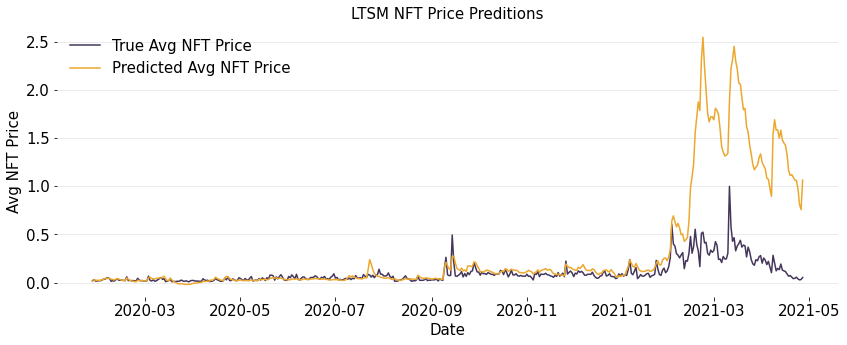

In [53]:
plt.figure(figsize=(14, 5)) #width and height 
plt.plot(gs_slic_data['date'], gs_slic_data['True_Price'],label='True Avg NFT Price',color='#44355B' ); # add lable
plt.plot(gs_slic_data['date'], gs_slic_data['Predicted'], label='Predicted Avg NFT Price', color='#ECA72C'); # use hex number for the color 
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.title('LTSM NFT Price Preditions',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Avg NFT Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=False,fontsize=15); # dispaly legend 
plt.grid (axis='y', alpha=0.3) # you can add gridline  and alpha to increase transparency 

In [54]:
model.fit(train_x, train_y,epochs=50)

Epoch 1/50
23/23 [==============================] - 1s 35ms/step - loss: 2.8196e-04 - mean_absolute_error: 0.0089
Epoch 2/50
23/23 [==============================] - 1s 40ms/step - loss: 2.7250e-04 - mean_absolute_error: 0.0089
Epoch 3/50
23/23 [==============================] - 1s 41ms/step - loss: 2.6913e-04 - mean_absolute_error: 0.0087
Epoch 4/50
23/23 [==============================] - 1s 39ms/step - loss: 2.4798e-04 - mean_absolute_error: 0.0085
Epoch 5/50
23/23 [==============================] - 1s 37ms/step - loss: 2.5829e-04 - mean_absolute_error: 0.0087
Epoch 6/50
23/23 [==============================] - 1s 41ms/step - loss: 2.4968e-04 - mean_absolute_error: 0.0085
Epoch 7/50
23/23 [==============================] - 1s 41ms/step - loss: 2.3670e-04 - mean_absolute_error: 0.0083
Epoch 8/50
23/23 [==============================] - 1s 39ms/step - loss: 2.7201e-04 - mean_absolute_error: 0.0101
Epoch 9/50
23/23 [==============================] - 1s 38ms/step - loss: 2.3149e-04 - me

In [55]:
test_predictedTrain = model.predict(train_x)

In [56]:
gs_slic_data1=pd.DataFrame(test_predictedTrain,columns=['Predicted','Second'])

In [57]:
True_price=pd.DataFrame(train_y)

In [58]:
gs_slic_data1['True_Price']=True_price

In [59]:
gs_slic_data1["date"]=df_LSTM['date'].iloc[:len(gs_slic_data1)].values
gs_slic_data1["date"]=pd.to_datetime(gs_slic_data1["date"])

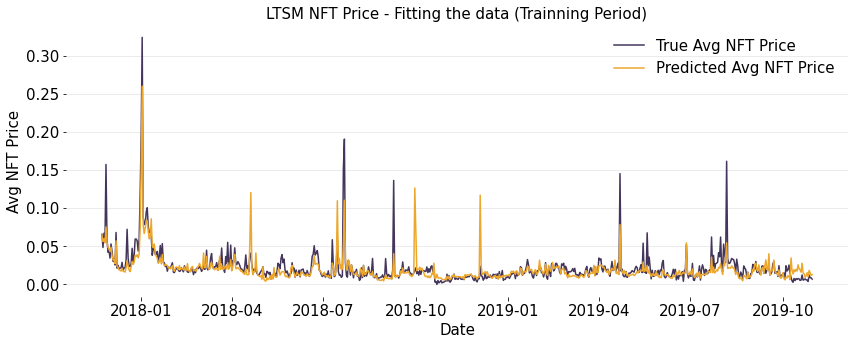

In [60]:
plt.figure(figsize=(14, 5)) #width and height 
plt.plot(gs_slic_data1['date'], gs_slic_data1['True_Price'],label='True Avg NFT Price',color='#44355B' ); # add lable
plt.plot(gs_slic_data1['date'], gs_slic_data1['Predicted'], label='Predicted Avg NFT Price', color='#ECA72C'); # use hex number for the color 
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.title('LTSM NFT Price - Fitting the data (Trainning Period)',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Avg NFT Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=False,fontsize=15); # dispaly legend 
plt.grid (axis='y', alpha=0.3) # you can add gridline  and alpha to increase transparency 

In [61]:
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape = (train_x.shape[1:])))

model2.add(Dropout(0.1)) 
model2.add(LSTM(units=50))

model2.add(Dense(2))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 45, 50)            11400     
                                                                 
 dropout_1 (Dropout)         (None, 45, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 31,702
Trainable params: 31,702
Non-trainable params: 0
_________________________________________________________________


In [62]:
model2.fit(train_x[100:], train_y[100:],epochs=50)

Epoch 1/50
19/19 [==============================] - 7s 42ms/step - loss: 3.0908e-04 - mean_absolute_error: 0.0104
Epoch 2/50
19/19 [==============================] - 1s 44ms/step - loss: 2.6505e-04 - mean_absolute_error: 0.0086
Epoch 3/50
19/19 [==============================] - 1s 41ms/step - loss: 2.6165e-04 - mean_absolute_error: 0.0084
Epoch 4/50
19/19 [==============================] - 1s 37ms/step - loss: 2.7230e-04 - mean_absolute_error: 0.0090
Epoch 5/50
19/19 [==============================] - 1s 42ms/step - loss: 2.6372e-04 - mean_absolute_error: 0.0087
Epoch 6/50
19/19 [==============================] - 1s 42ms/step - loss: 2.5942e-04 - mean_absolute_error: 0.0086
Epoch 7/50
19/19 [==============================] - 1s 42ms/step - loss: 2.5783e-04 - mean_absolute_error: 0.0085
Epoch 8/50
19/19 [==============================] - 1s 37ms/step - loss: 2.5820e-04 - mean_absolute_error: 0.0084
Epoch 9/50
19/19 [==============================] - 1s 37ms/step - loss: 2.5950e-04 - me

In [63]:
test_predicted2 = model2.predict(validation_x[80:])

In [64]:
gs_slic_data2=pd.DataFrame(test_predicted2,columns=['Predicted','Second'])

In [65]:
True_price=pd.DataFrame(validation_y[80:])

In [66]:
gs_slic_data2['True_Price']=True_price

In [67]:
gs_slic_data2["date"]=df_LSTM['date'].iloc[-len(gs_slic_data2):].values
gs_slic_data2["date"]=pd.to_datetime(gs_slic_data2["date"])

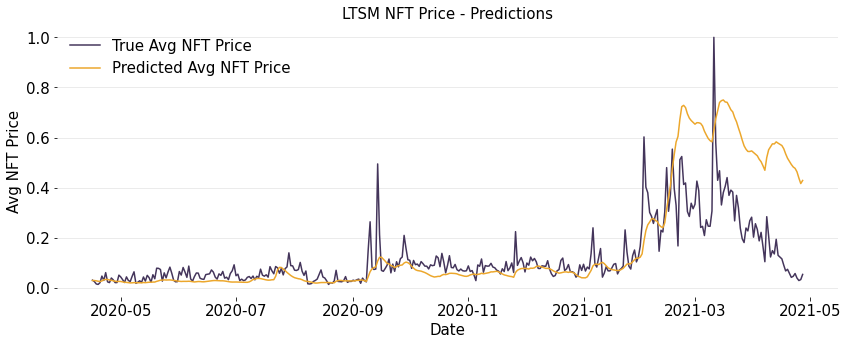

In [70]:
plt.figure(figsize=(14, 5)) #width and height 
plt.plot(gs_slic_data2['date'], gs_slic_data2['True_Price'],label='True Avg NFT Price',color='#44355B' ); # add lable
plt.plot(gs_slic_data2['date'], gs_slic_data2['Predicted'], label='Predicted Avg NFT Price', color='#ECA72C'); # use hex number for the color 
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.title('LTSM NFT Price - Predictions',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Avg NFT Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=False,fontsize=15); # dispaly legend 
plt.grid (axis='y', alpha=0.3) # you can add gridline  and alpha to increase transparency 